In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [5]:
df.drop('Cabin',axis='columns',inplace=True)

<Axes: >

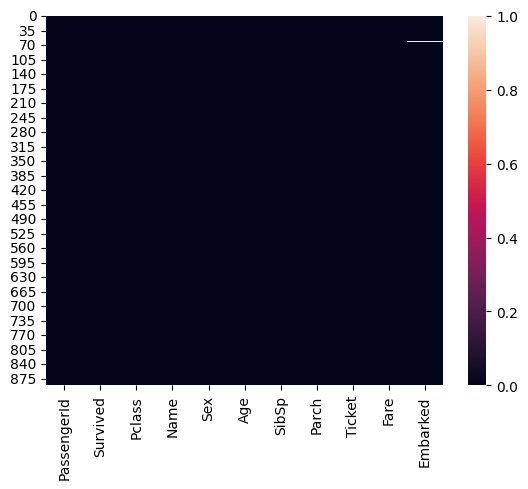

In [6]:
sns.heatmap(df.isna())

In [7]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
df.Sex.value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
df.Embarked.value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
sex


,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [12]:
embarked = pd.get_dummies(df['Embarked'])
embarked


,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [13]:
df = pd.concat([df,sex,embarked],axis='columns')
df
df.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis='columns',inplace=True)
df.rename(columns={'male':'GenderMAle'},inplace=True)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   GenderMAle  891 non-null    bool   
 7   C           891 non-null    bool   
 8   Q           891 non-null    bool   
 9   S           891 non-null    bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 45.4 KB


**EXPLORATORY DATA ANALYSIS**

In [14]:
print("data frame shape is", df.shape)
df.describe()

data frame shape is (891, 10)


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

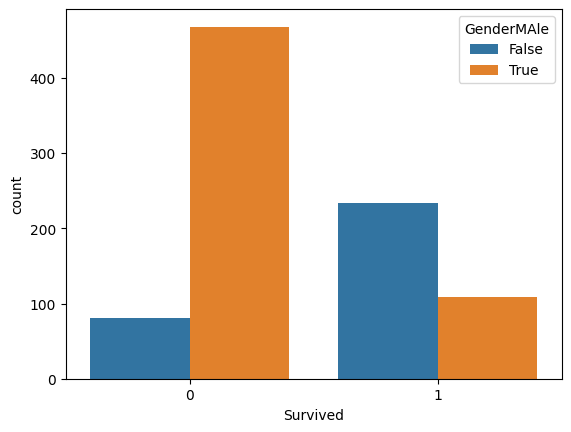

In [15]:
sns.countplot(x='Survived',data=df,hue='GenderMAle')

<Axes: >

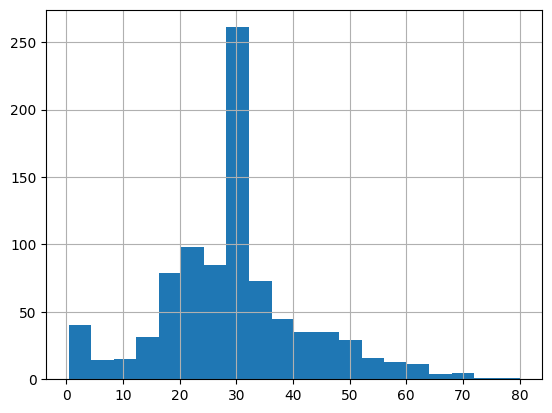

In [16]:
df['Age'].hist(bins=20)

<Axes: >

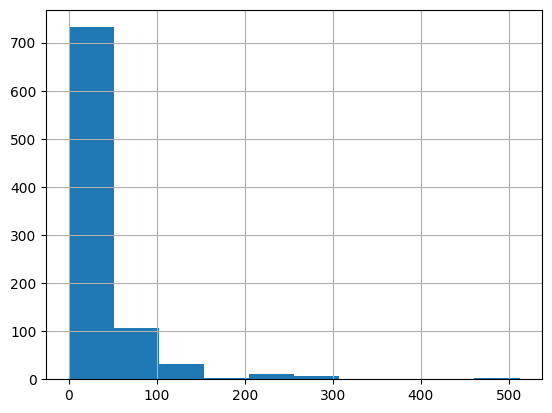

In [17]:
df['Fare'].hist()

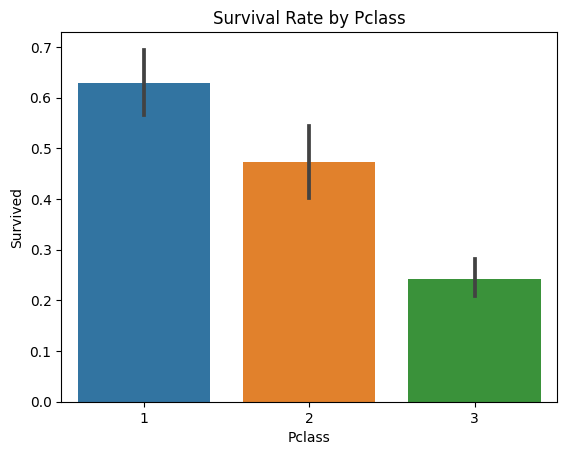

In [18]:
# Relationship between Pclass and Survival
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()



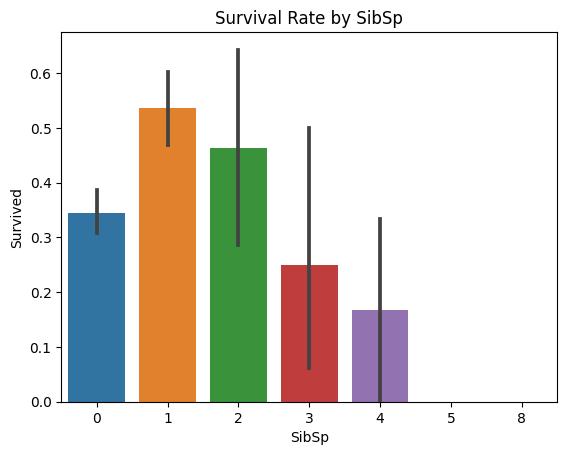

In [19]:
# Relationship between SibSp (Siblings/Spouses Aboard) and Survival
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by SibSp')
plt.show()



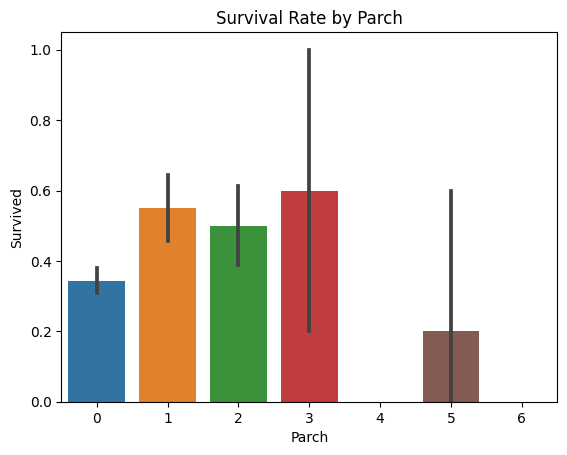

In [20]:
# Relationship between Parch (Parents/Children Aboard) and Survival
sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by Parch')
plt.show()



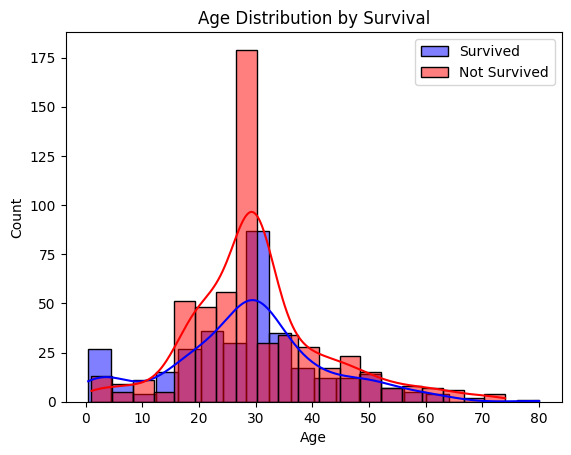

In [21]:
# Age distribution for both survivors and non-survivors
sns.histplot(df[df['Survived'] == 1]['Age'], bins=20, kde=True, label='Survived', color='blue')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=20, kde=True, label='Not Survived', color='red')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()




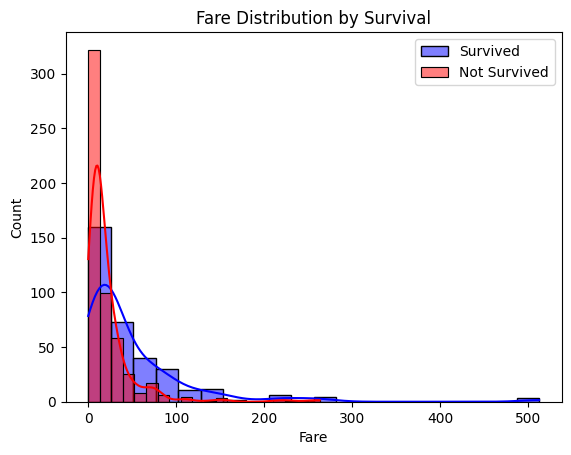

In [22]:
# Fare distribution for both survivors and non-survivors
sns.histplot(df[df['Survived'] == 1]['Fare'], bins=20, kde=True, label='Survived', color='blue')
sns.histplot(df[df['Survived'] == 0]['Fare'], bins=20, kde=True, label='Not Survived', color='red')
plt.title('Fare Distribution by Survival')
plt.legend()
plt.show()



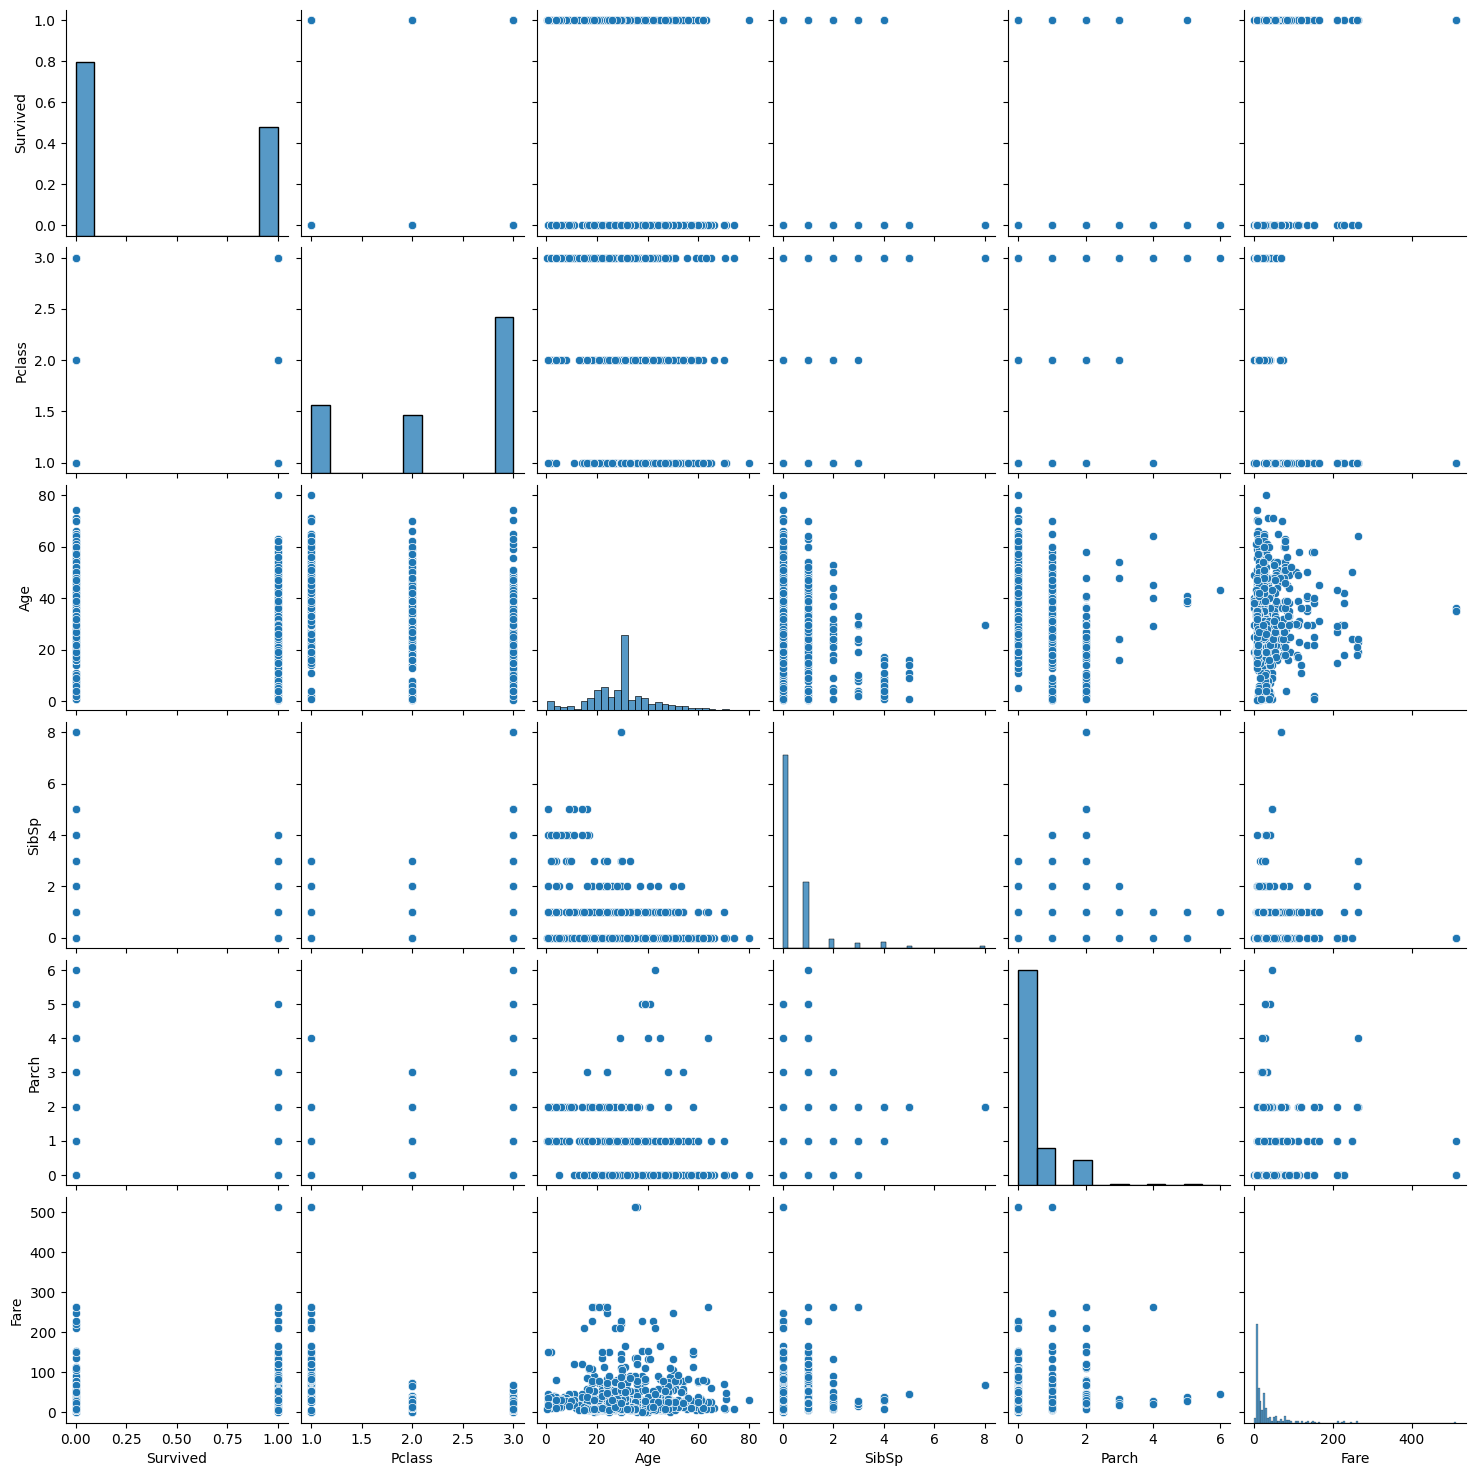

In [23]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
plt.show()